# **Penerapan Metode Decision Tree untuk Prakiraan Cuaca**


## **Latar Belakang**


Prakiraan cuaca adalah suatu aspek penting dalam kehidupan sehari-hari, memengaruhi banyak keputusan seperti perencanaan aktivitas luar ruangan, pengelolaan sumber daya, dan keamanan masyarakat. Keterbatasan prakiraan cuaca tradisional sering kali menjadi tantangan, dan inovasi dalam teknologi dapat membuka peluang untuk meningkatkan akurasi prediksi cuaca.

Untuk memprediksi kondisi cuaca di suatu daerah dengan akurat, diperlukan teknologi yang dapat menganalisis dan memprediksi kondisi cuaca pada daerah tersebut. Salah satu teknologi yang bisa digunakan adalah machine learning (ML). ML adalah cabang dari Artificial Intelligence (AI) yang memungkinkan komputer untuk mengembangkan perilaku berdasarkan data empiris atau data yang diperoleh dari observasi atau percobaan. Model-machine learning dapat memanfaatkan data historis cuaca, termasuk parameter seperti suhu, kelembaban, kecepatan angin, dan tekanan udara, untuk memprediksi kondisi cuaca di masa depan.

ML mencoba mengolah data yang diobservasi yang kemudian akan mendapatkan hasil yaitu pola cuaca dan nantinya pola tersebut dapat membantu menganalisis cuaca yang sering berubah-ubah sehingga dapat memperkirakan kondisi cuaca pada saat itu dengan akurat. Tingkat akurasi tersebut dilihat dari data yang diobservasi. Jika data yang digunakan sebagai observasi menyesatkan dan menghasilkan overfitting, maka tingkat akurasi yang dihasilkan sangat buruk.

## **Tujuan**

Tujuan utama adalah untuk membuktikan apakah metode decision tree dapat dijadikan salah satu
metode untuk melakukan prediksi atau prakiraan cuaca.

Rumusan pertanyaan dalam penelitian ini adalah:

1. Faktor-faktor Apa Saja yang Paling Mempengaruhi Temperatur?
2. Pengaruh Kelembaban Terhadap Cuaca?
3. Seberapa Akurat Model Decision Tree dalam Memprediksi Kondisi Cuaca?
4. Apakah Terdapat Tren Perubahan Cuaca dalam Jangka Waktu Tertentu?


## **Dataset**


Data yang akan digunakan dalam projek ini adalah diperoleh dari timeanddate.com, dengan melakukan web scraping menggunakan library python BeautifulSoup.
timeanddate.com adalah situs yang menyediakan data dan informasi tentang keseharian kondisi cuaca. Dataset ini berisi data cuaca yang diobservasi pada waktu tertentu, termasuk parameter seperti suhu, kelembaban, kecepatan angin, tekanan udara, dan lainnya.


## **1. Library & Load Dataset**


Libarary yang digunakan adalah yang paling terkenal untuk analisis data, plot, tabel dan operasi matematika (pandas, matplotlib, numpy). Selain itu, library yang digunakan untuk membangun model machine learning adalah scikit-learn. Lalu untuk visualisasi data, digunakan library seaborn dan missingno .


In [87]:
import pandas as pd
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import category_encoders as ce
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [88]:
dataset = pd.read_csv("weather_data.csv")

## **2. Eksplorasi Dataset**


In [89]:
dataset.head()

,Time,Temp,Weather,Wind,Direction,Humidity,Barometer,Visibility
0,1,28,Passing clouds.,NaN,↑,82,1011,6
1,4,27,Passing clouds.,NaN,↑,85,1010,6
2,7,27,Partly sunny.,NaN,↑,84,1011,6
3,10,30,Partly sunny.,6.0,↑,73,1013,7
4,13,32,Partly sunny.,6.0,↑,66,1010,7


Berikut penjelasan masing-masing kolom:

1. `Time`: Waktu pengamatan. Ini adalah variabel kuantitatif yang diukur dalam jam.

2. `Temp`: Suhu yang dicatat pada waktu tertentu. Diukur dalam derajat dengan skala Celcius.

3. `Weather`: Kondisi cuaca yang dicatat pada waktu tertentu. Ini adalah variabel kategori dengan nilai seperti "Passing clouds" atau "Partly sunny".

4. `Wind`: Kecepatan angin yang dicatat pada waktu tertentu. Diukur dalam kilometer per jam.

5. `Direction`: Arah angin yang dicatat pada waktu tertentu. Dikarenakan pada dataset ini hanya terdapat satu arah angin, maka kolom ini tidak digunakan.

6. `Humidity`: Kelembaban yang dicatat pada waktu tertentu. Diukur dalam persen.

7. `Barometer`: Tekanan udara yang dicatat pada waktu tertentu. Diukur dalam milibar.

8. `Visibility`: Jarak pandang yang dicatat pada waktu tertentu. Diukur dalam kilometer.


Melihat data (ditunjukkan di atas), saya melihat beberapa titik data yang hilang, yang merupakan pengingat bahwa data yang dikumpulkan di dunia nyata tidak akan pernah sempurna. Data yang hilang dapat sangat memengaruhi analisis, begitu pula data yang salah atau outlier.


In [90]:
print("Shape data (baris, kolom):" + str(dataset.shape))
print(dataset.info())

Shape data (baris, kolom):(1134, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        1134 non-null   int64  
 1   Temp        1134 non-null   int64  
 2   Weather     1134 non-null   object 
 3   Wind        453 non-null    float64
 4   Direction   1134 non-null   object 
 5   Humidity    1134 non-null   int64  
 6   Barometer   1134 non-null   int64  
 7   Visibility  1134 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 71.0+ KB
None


Informasi pada data:

1. Data ini berisi 1134 baris dan 8 kolom.
2. Terdapat 1 kolom yang memiliki nilai NaN, yaitu kolom `Wind`.
3. Terdapat 2 kolom yang memiliki tipe data object, yaitu kolom `Weather` dan `Direction`.
4. Terdapat 5 kolom yang memiliki tipe data int, yaitu kolom `Time`, `Temp`, `Humidity`, `Barometer`, `Visibility`.
5. Terdapat 1 kolom yang memiliki tipe data float, yaitu kolom `Wind`.


Selain itu, kita dapat menggunakan metode “.isnull()” dan “.sum()” langsung pada dataframe kita untuk menemukan jumlah total nilai yang hilang di setiap kolom.


In [91]:
dataset.isnull().sum()

Time            0
Temp            0
Weather         0
Wind          681
Direction       0
Humidity        0
Barometer       0
Visibility      0
dtype: int64

In [92]:
dataset.describe()

,Time,Temp,Wind,Humidity,Barometer,Visibility
count,1134.000000,1134.000000,453.000000,1134.000000,1134.000000,1134.000000
mean,11.039683,29.074956,10.693157,72.813933,1011.285714,6.395944
std,6.725826,2.068259,5.045884,8.228840,1.405897,0.489268
min,1.000000,26.000000,6.000000,53.000000,1008.000000,6.000000
25%,4.000000,27.000000,6.000000,67.000000,1010.000000,6.000000
50%,10.000000,29.000000,11.000000,74.500000,1011.000000,6.000000
75%,16.000000,31.000000,13.000000,78.000000,1012.000000,7.000000
max,22.000000,33.000000,22.000000,88.000000,1014.000000,7.000000


Informasi pada data diatas:
1. Waktu (`Time`): Data ini terdiri dari 1134 pengamatan dengan rentang waktu tertentu.
2. Suhu (`Temp`): Rata-rata suhu adalah sekitar 29.07°C, dengan variasi dari 26°C hingga 33°C.
3. Kecepatan Angin (``Wind``): Rata-rata kecepatan angin adalah sekitar 10.69, dengan nilai minimum 6 dan maksimum 22.
4. Kelembaban (`Humidity`): Rata-rata kelembaban adalah sekitar 72.81%, dengan nilai minimum 53% dan maksimum 88%.
5. Tekanan Udara (`Barometer`): Rata-rata tekanan udara (barometer) adalah sekitar 1011.29, dengan nilai minimum 1008 dan maksimum 1014.
6. Jarak Pandang (`Visibility`): Jarak pandang rata-rata adalah sekitar 6.40

In [93]:
for col in dataset.columns:
    if dataset.dtypes[col] != "object":
        continue
    print("-" * 40 + col + "-" * 40, end=" - ")
    display(dataset[col].value_counts().head(10))

----------------------------------------Weather---------------------------------------- - 

Weather
Passing clouds.             484
Partly sunny.               474
Scattered clouds.            91
Overcast.                    54
Thunderstorms. Overcast.     31
Name: count, dtype: int64

----------------------------------------Direction---------------------------------------- - 

Direction
↑    1134
Name: count, dtype: int64

Informasi pada data:

1. "Passing clouds." merupakan kondisi cuaca yang paling umum, dengan frekuensi 484 kali, sementara "thunderstorms" hanya terjadi 31 kali.


<Axes: >

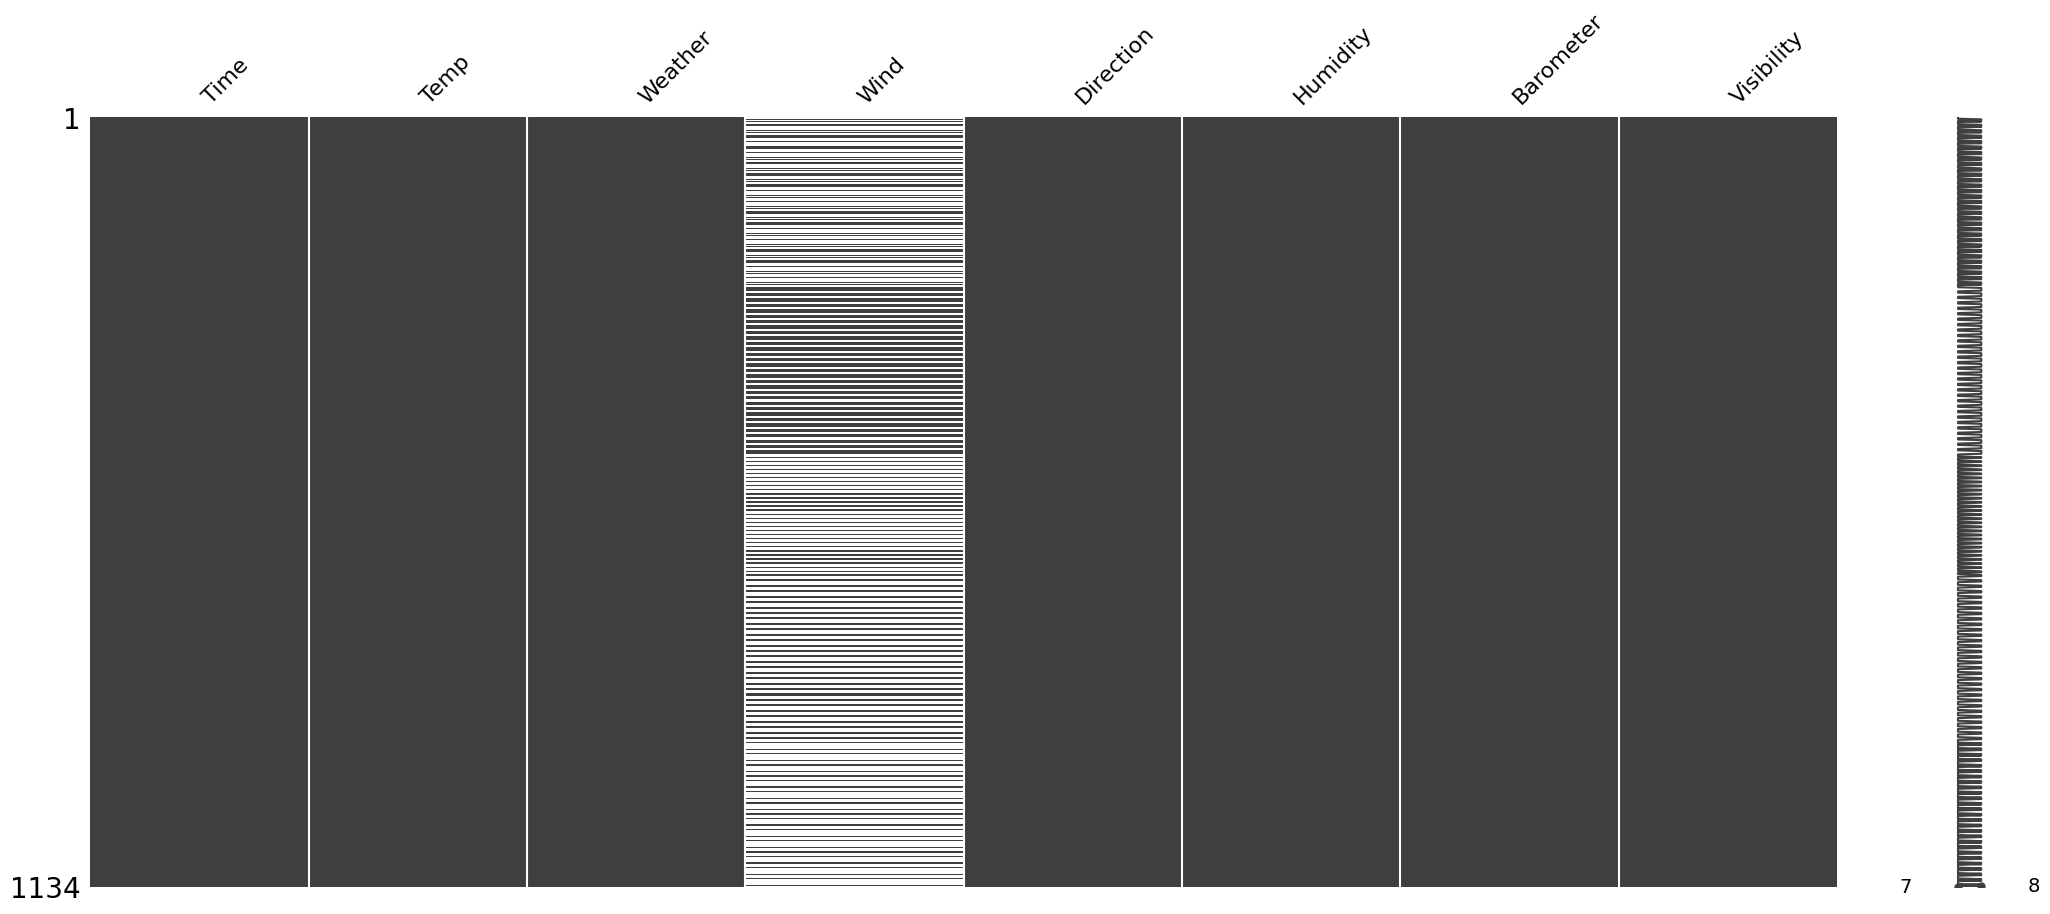

In [94]:
msno.matrix(dataset)

Dapat kita lihat bahwa banyak data yang kosong di kolom `Wind`. Untuk kolom yang lain aman (ditandai dengan kotak full hitam).
Kita dapat mengisi data yang kosong tersebut dengan menggunakan metode “.fillna()” pada dataframe kita. Kita dapat mengisi data yang kosong dengan nilai rata-rata dari kolom tersebut.


## **3. Data Cleaning**


<Axes: >

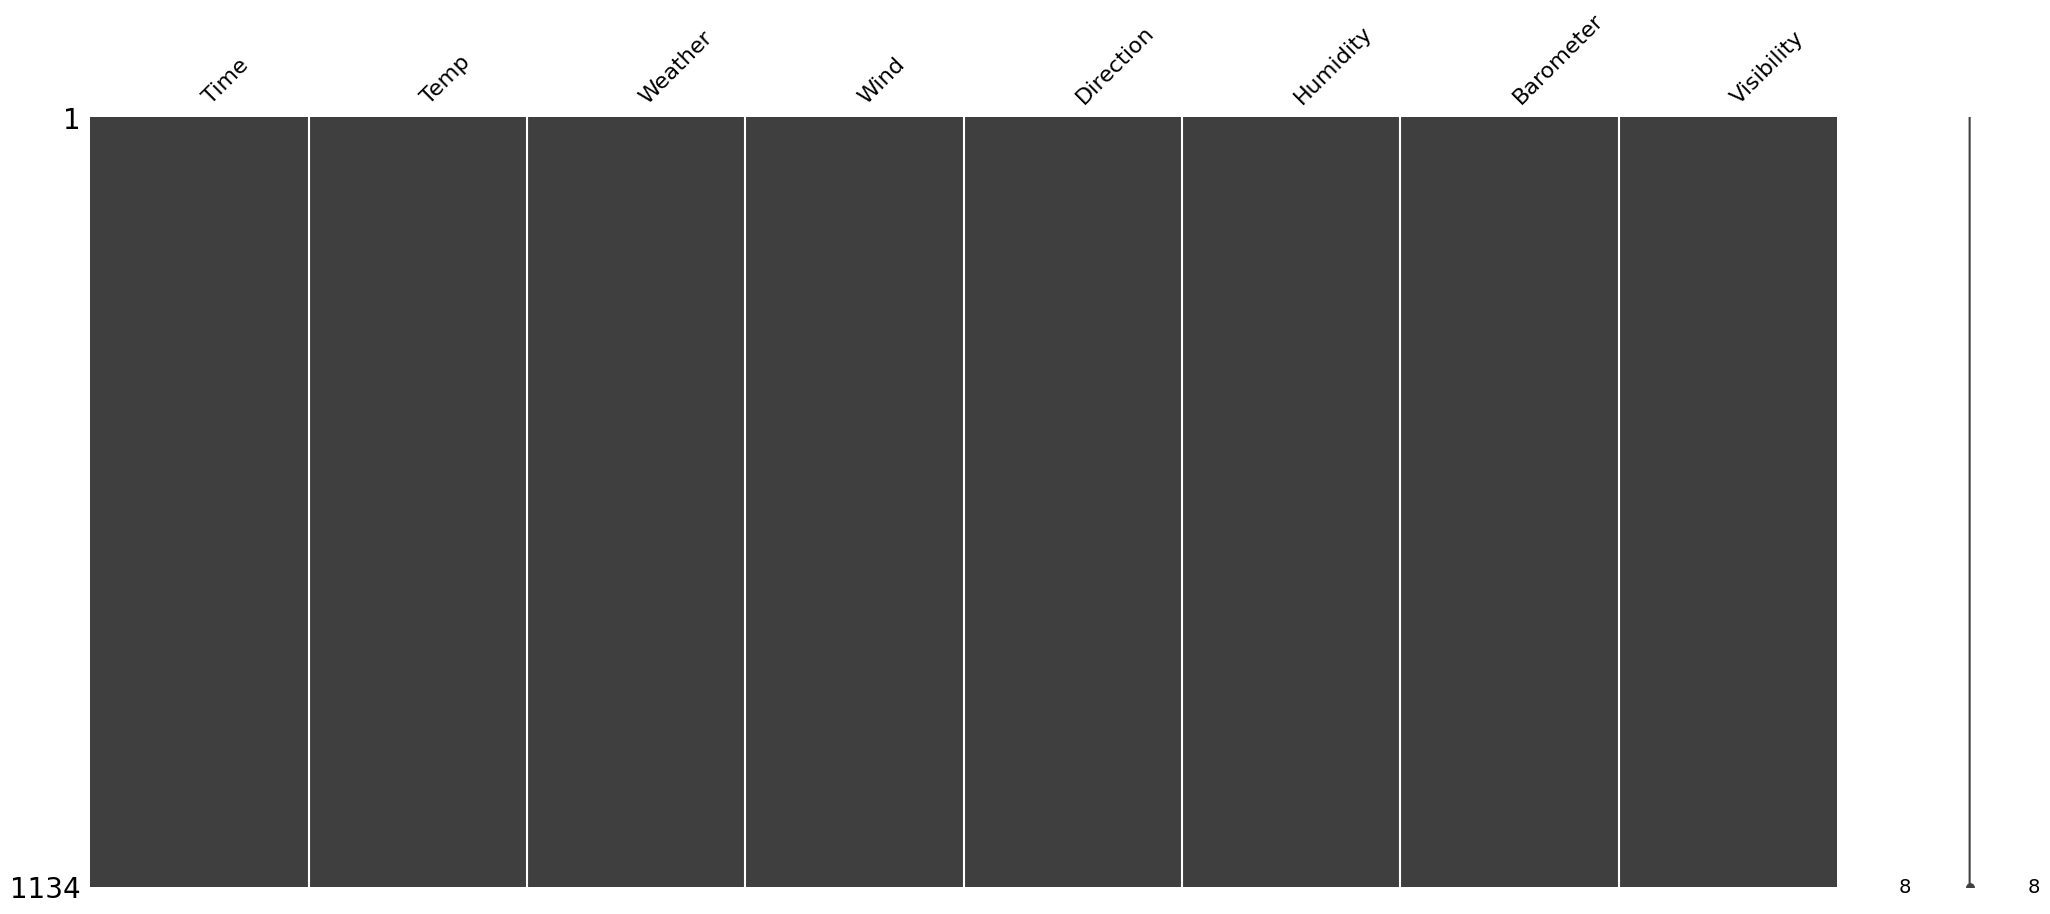

In [95]:
dataset["Wind"].fillna(value=0, inplace=True)
dataset["Wind"] = dataset["Wind"].astype(int)

msno.matrix(dataset)

### Menghapus kolom yang tidak diperlukan


In [96]:
dataset.drop(['Direction'], axis=1, inplace=True)
dataset.head()

,Time,Temp,Weather,Wind,Humidity,Barometer,Visibility
0,1,28,Passing clouds.,0,82,1011,6
1,4,27,Passing clouds.,0,85,1010,6
2,7,27,Partly sunny.,0,84,1011,6
3,10,30,Partly sunny.,6,73,1013,7
4,13,32,Partly sunny.,6,66,1010,7


### Mengatasi Data Outlier

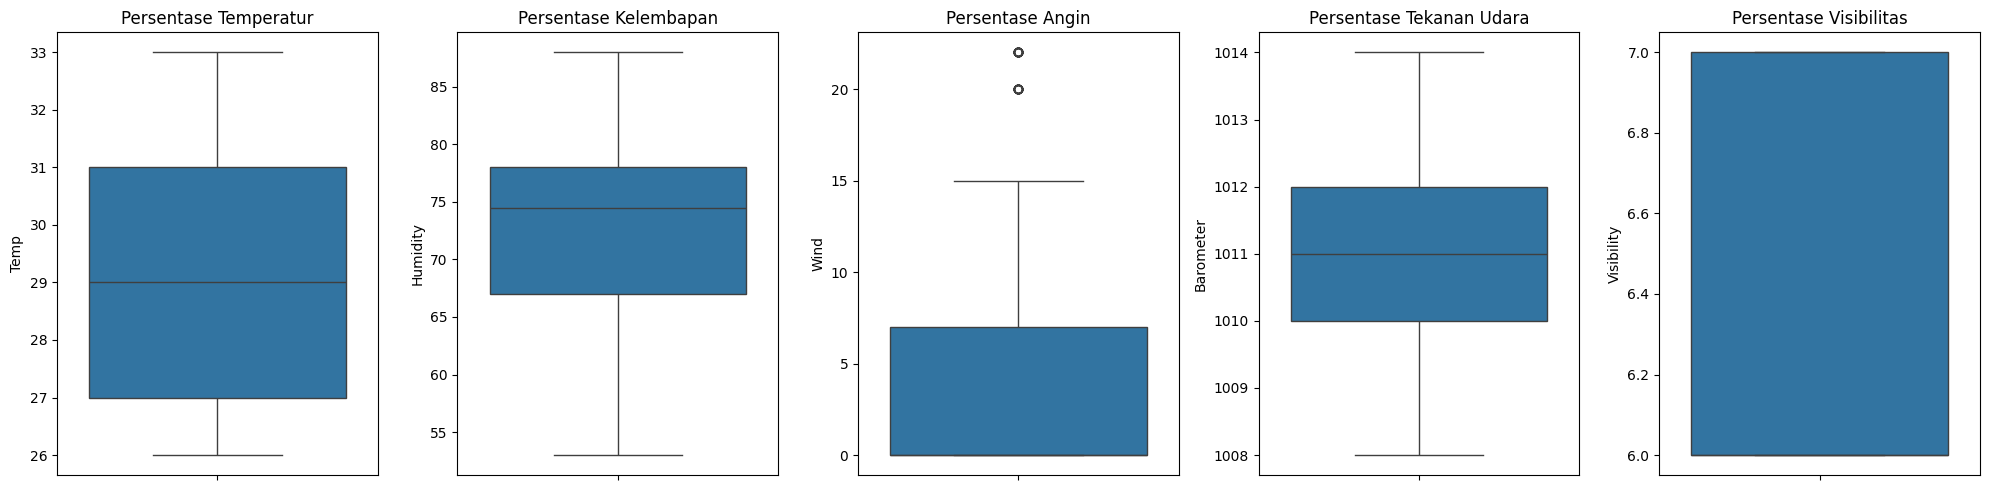

In [97]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
sns.boxplot(ax=axes[0], data=dataset["Temp"])
axes[0].set_title("Persentase Temperatur")
sns.boxplot(ax=axes[1], data=dataset["Humidity"])
axes[1].set_title("Persentase Kelembapan")
sns.boxplot(ax=axes[2], data=dataset["Wind"])
axes[2].set_title("Persentase Angin")
sns.boxplot(ax=axes[3], data=dataset["Barometer"])
axes[3].set_title("Persentase Tekanan Udara")
sns.boxplot(ax=axes[4], data=dataset["Visibility"])
axes[4].set_title("Persentase Visibilitas")

plt.tight_layout()
plt.show()

In [98]:
Q1 = dataset['Wind'].quantile(0.25)
Q3 = dataset['Wind'].quantile(0.75)
IQR = Q3 - Q1
filter = (dataset['Wind'] >= Q1 - 1.5 * IQR) & (dataset['Wind'] <= Q3 + 1.5 *IQR)
data_filtered=dataset.loc[filter]

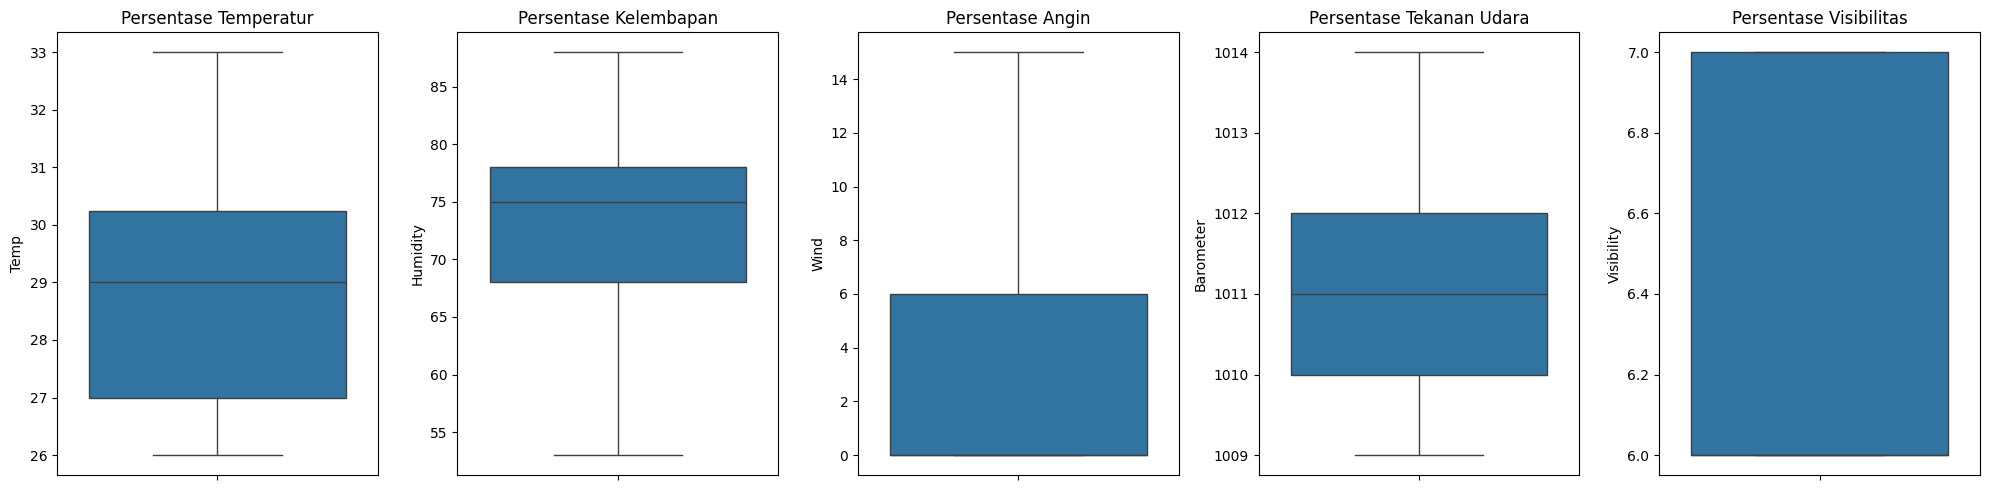

In [99]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
sns.boxplot(ax=axes[0], data=data_filtered["Temp"])
axes[0].set_title("Persentase Temperatur")
sns.boxplot(ax=axes[1], data=data_filtered["Humidity"])
axes[1].set_title("Persentase Kelembapan")
sns.boxplot(ax=axes[2], data=data_filtered["Wind"])
axes[2].set_title("Persentase Angin")
sns.boxplot(ax=axes[3], data=data_filtered["Barometer"])
axes[3].set_title("Persentase Tekanan Udara")
sns.boxplot(ax=axes[4], data=data_filtered["Visibility"])
axes[4].set_title("Persentase Visibilitas")

plt.tight_layout()
plt.show()

## **4. Visualisasi Data**


### Korelasi antara `temperature` dengan variabel lain


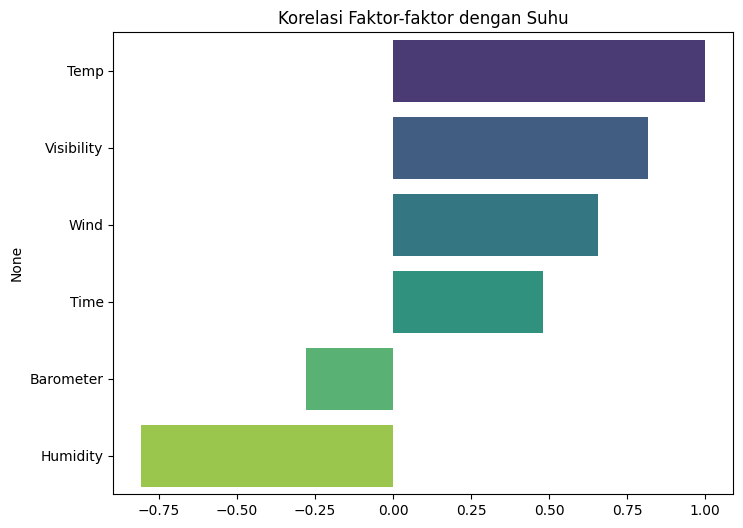

In [100]:
numeric_columns = data_filtered.select_dtypes(include=[np.number]).columns
correlation_matrix = data_filtered[numeric_columns].corr()
temperature_correlation = correlation_matrix["Temp"].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=temperature_correlation.values,
    y=temperature_correlation.index,
    palette="viridis",
    hue=temperature_correlation.index
)
plt.title("Korelasi Faktor-faktor dengan Suhu")
plt.show()

Pada korelasi data diatas dapat dilihat bahwa kolom `Temp` memiliki korelasi negatif yang kuat dengan kolom `Humidity` dan `Barometer`.


Nilai korelasi sebesar -0,75 antara `Temp` dan `Humidity` menunjukkan korelasi negatif yang kuat. Ini berarti bahwa ketika `Temp` meningkat, `Humidity` cenderung menurun, dan vice versa.

Dengan menggunakan korelasi, kita dapat mengidentifikasi faktor-faktor yang paling mempengaruhi suhu. Nilai korelasi mendekati 1 atau -1 menunjukkan hubungan yang kuat. Nilai korelasi mendekati 0 menunjukkan hubungan yang lemah.


<Axes: >

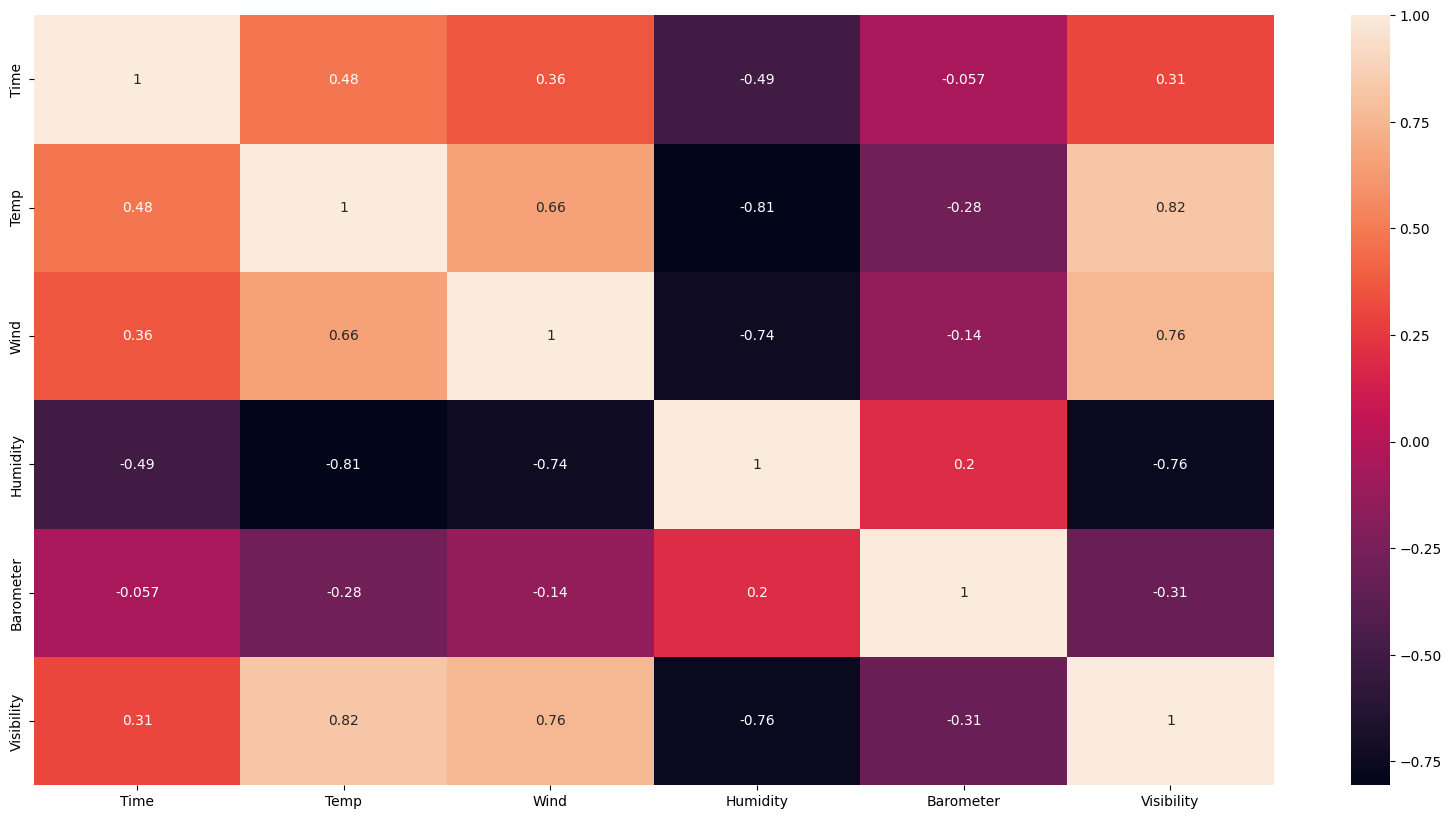

In [101]:
numeric_data = data_filtered.select_dtypes(include=[np.number])

plt.figure(figsize = (20,10))
sns.heatmap(numeric_data.corr(), annot = True)

### Visualisasi distribusi kondisi cuaca berdasarkan kelembapan

Grafik ini dapat membantu memahami bagaimana distribusi kondisi cuaca (misalnya, overcast, passing clouds) bervariasi berdasarkan arah angin.


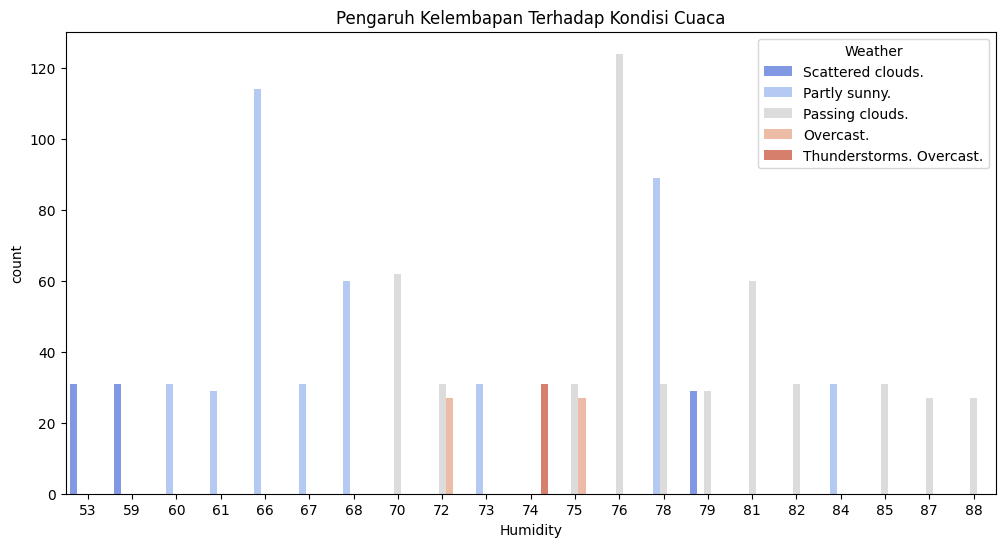

In [102]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Humidity", hue="Weather", data=data_filtered, palette="coolwarm")
plt.title("Pengaruh Kelembapan Terhadap Kondisi Cuaca")
plt.show()

### Visualisasi tren suhu sepanjang waktu


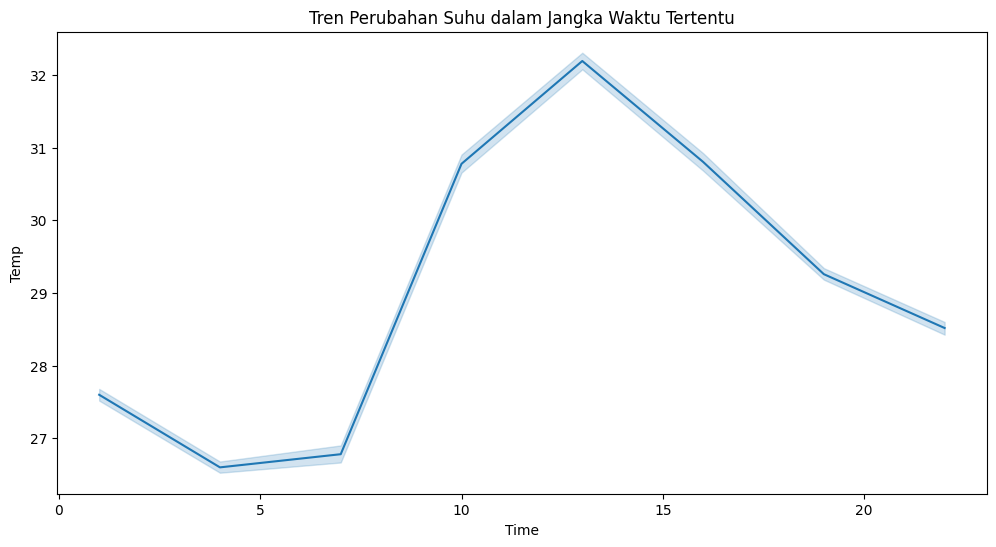

In [103]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Time", y="Temp", data=dataset)
plt.title("Tren Perubahan Suhu dalam Jangka Waktu Tertentu")
plt.show()

Grafik garis ini membantu melihat tren perubahan suhu sepanjang waktu. Dimana dari grafik tersebut dapat dilihat bahwa suhu cenderung naik pada jam 12 siang dan terus turun hingga jam 12 malam.


## **5. Machine Learning Model**


Mendeklarasikan feature vector dan target variabel, lalu memisahkan data ke training set dan test set

In [104]:
x = data_filtered.drop(["Weather"], axis=1)
y = data_filtered["Weather"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

### Training

Menginisiasi model DecisionTreeClassifier dan melakukan fit model terhadap data training

In [105]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

Memprediksi hasil set Tes

In [106]:
y_pred_gini = clf_gini.predict(xTest)

Mengevaluasi seberapa baik model dilatih dengan data training.

In [107]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(yTest, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8961


Membangdingkan akurasi train-set dan test-set

In [108]:
y_pred_train_gini = clf_gini.predict(xTrain)

y_pred_train_gini

array(['Scattered clouds.', 'Passing clouds.', 'Passing clouds.',
       'Partly sunny.', 'Passing clouds.', 'Passing clouds.',
       'Partly sunny.', 'Passing clouds.', 'Partly sunny.',
       'Passing clouds.', 'Passing clouds.', 'Passing clouds.',
       'Partly sunny.', 'Partly sunny.', 'Passing clouds.',
       'Passing clouds.', 'Partly sunny.', 'Partly sunny.',
       'Passing clouds.', 'Partly sunny.', 'Partly sunny.',
       'Partly sunny.', 'Partly sunny.', 'Partly sunny.', 'Partly sunny.',
       'Passing clouds.', 'Partly sunny.', 'Partly sunny.',
       'Passing clouds.', 'Passing clouds.', 'Passing clouds.',
       'Passing clouds.', 'Passing clouds.', 'Partly sunny.',
       'Passing clouds.', 'Scattered clouds.', 'Partly sunny.',
       'Passing clouds.', 'Scattered clouds.', 'Partly sunny.',
       'Scattered clouds.', 'Passing clouds.', 'Passing clouds.',
       'Scattered clouds.', 'Passing clouds.', 'Passing clouds.',
       'Partly sunny.', 'Partly sunny.', 'Passi

In [109]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(yTrain, y_pred_train_gini)))


Training-set accuracy score: 0.8931


Mengecek overfitting dan underfitting

In [110]:
print('Training set score: {:.4f}'.format(clf_gini.score(xTrain, yTrain)))

print('Test set score: {:.4f}'.format(clf_gini.score(xTest, yTest)))

Training set score: 0.8931
Test set score: 0.8961


Di sini, skor akurasi set training adalah 0.8931 sedangkan akurasi set test menjadi 0.8961. Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting.

### Feature Importance


Decision Tree dapat menemukan pentingnya feature dengan sendirinya. Di bawah ini adalah beberapa pentingnya 6 fitur.

In [155]:
feature_importance_df = pd.DataFrame({
    'Feature' : xTrain.columns,
    'Importance' : clf_gini.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_df['Importance'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

Mari kita lihat seberapa pentingnya 6 feature teratas.


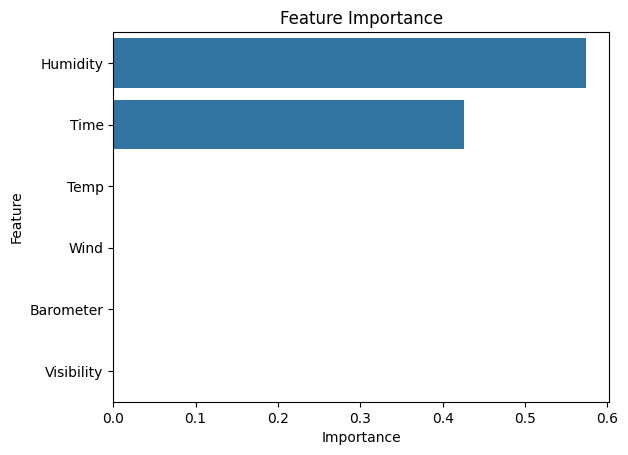

In [156]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(6), x='Importance', y='Feature');

Dari kesimpulan diatas, feature `Humidity` adalah yang paling penting, diikuti oleh `Time`.

### Decision Tree Classification Confusion Matrix


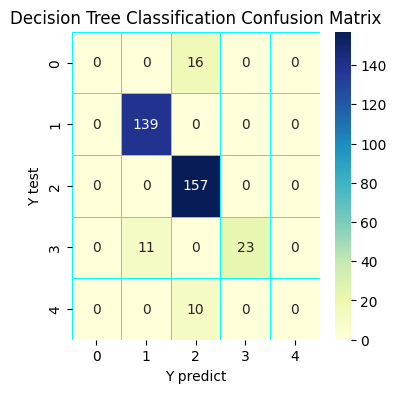

In [140]:
dtcla_cm = confusion_matrix(yTest, y_pred_gini)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Di mana:

- TP (True Positive) adalah jumlah prediksi positif yang benar.
- TN (True Negative) adalah jumlah prediksi negatif yang benar.
- FP (False Positive) adalah jumlah prediksi positif yang salah.
- FN (False Negative) adalah jumlah prediksi negatif yang salah.

Berdasarkan matrix tersebut, berikut adalah kesimpulannya:

- Tidak ada prediksi yang benar untuk kelas pertama (TP = 0) dan semua prediksi untuk kelas ini salah diarahkan ke kelas ketiga (FP = 16).
- Kelas kedua memiliki prediksi yang sempurna dengan semua 139 prediksi yang benar (TP = 139) dan tidak ada kesalahan (FP dan FN = 0).
- Kelas ketiga juga memiliki prediksi yang sangat baik dengan 157 TP dan tidak ada kesalahan.
- Kelas keempat memiliki beberapa kesalahan dengan 11 FN, yang berarti ada 11 instans yang seharusnya diklasifikasikan ke kelas ini tetapi salah diklasifikasikan ke kelas lain, namun masih memiliki 23 TP.
- Kelas kelima memiliki semua prediksi yang salah diarahkan ke kelas lain (TP = 0, FP = 10).

Confusion matrix ini menunjukkan bahwa model tersebut sangat baik dalam mengklasifikasikan kelas kedua dan ketiga, namun perlu perbaikan dalam mengklasifikasikan kelas pertama, keempat, dan kelima.

### Classification Report

Classification report adalah cara lain untuk mengevaluasi kinerja model klasifikasi. Dengan menampilkan presisi, recall, f1 skor dan support untuk model

In [129]:
print(classification_report(yTest, y_pred_gini, zero_division=1))

                          precision    recall  f1-score   support

               Overcast.       1.00      0.00      0.00        16
           Partly sunny.       0.93      1.00      0.96       139
         Passing clouds.       0.86      1.00      0.92       157
       Scattered clouds.       1.00      0.68      0.81        34
Thunderstorms. Overcast.       1.00      0.00      0.00        10

                accuracy                           0.90       356
               macro avg       0.96      0.54      0.54       356
            weighted avg       0.91      0.90      0.86       356



Berikut adalah kesimpulan dari laporan klasifikasi yang Anda berikan:

- Overcast (Mendung) memiliki presisi sempurna (1.00) tetapi recallnya 0, yang menghasilkan skor f1 0.00. Ini menunjukkan bahwa meskipun model memprediksi dengan tepat, tidak ada prediksi yang benar untuk kelas ini.
- Partly sunny (Sebagian berawan) dan Passing clouds (Awan berlalu) memiliki presisi yang tinggi (0.93 dan 0.86) dan recall sempurna (1.00), menghasilkan skor f1 yang sangat baik (0.96 dan 0.92).
- Scattered clouds (Awan berceceran) memiliki presisi sempurna (1.00) dan recall yang cukup baik (0.68), dengan skor f1 yang solid (0.81).
- Thunderstorms. Overcast (Hujan petir. Mendung) juga memiliki presisi sempurna (1.00) tetapi tidak ada recall, sehingga skor f1 adalah 0.00.

Secara keseluruhan, model memiliki akurasi yang tinggi (0.90) dengan rata-rata makro untuk presisi, recall, dan skor f1 yang lebih rendah (0.96, 0.54, 0.54) karena kelas dengan recall rendah. Rata-rata tertimbang menunjukkan presisi yang baik (0.91), akurasi yang tinggi (0.90), dan skor f1 yang layak (0.86), menunjukkan bahwa model secara umum berkinerja baik pada sampel yang didukung lebih banyak.

## **6. Kesimpulan**

1. Pada proyek ini, saya membangun model Decision-Tree Classifier untuk memprediksi cuaca. Model menghasilkan kinerja yang sangat baik seperti yang ditunjukkan oleh akurasi model yaitu didapat 0.8961.

2. Pada model dengan kriteria indeks gini, skor akurasi set pelatihan adalah 0,8931 sedangkan akurasi set tes menjadi 0,8961. Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting.

3. Matriks Confusion dan laporan klasifikasi menghasilkan kinerja model yang sangat baik.